In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker
import warnings
warnings.filterwarnings("ignore")

***

# TweetsCov19
## KDE-Plot

****

In [2]:
path = '../data/tweetscov19_moderacy_polarized_users_with_atleast_one_polarized_domain.tsv'

df_tweetscov19_moderacy_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_moderates', 'Number_of_hardlines', 'Sum_polarised_domains', 'moderacy'])

print('Shape :', df_tweetscov19_moderacy_polarized_and_neutralized.shape)
df_tweetscov19_moderacy_polarized_and_neutralized.head()

Shape : (129134, 5)


,Username,Number_of_moderates,Number_of_hardlines,Sum_polarised_domains,moderacy
0,00008ca06f863b962f72cc9167d7978a,-1,0,1,-1.0000
1,00008de3f61d5f04329ee6867d5475b9,0,1,1,1.0000
2,00012a177385cd6e7590e2acb3f206e3,0,1,1,1.0000
3,00016e20a3865cb74581803c27d27b89,-1,0,1,-1.0000
4,0001a863c159122c712c53258cf13c8b,0,1,1,1.0000


In [3]:
pfad_tsv = '../data/TweetsCov19_alltweets_reputation_deletionratio.tsv'

df_tweetscov19_alltweets_reputation_deletionratio = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'Reputation', 'num_posted', 'num_deleted', 'Deletionratio'])

print('Form :', df_tweetscov19_alltweets_reputation_deletionratio.shape)
df_tweetscov19_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,Reputation,num_posted,num_deleted,Deletionratio
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,764191,132,True,0.9998,21,21,1.0000
1,1181705842275573766,c57d4fb895c5f4a33d2a2b24709f93b5,765034,132,True,0.9998,21,21,1.0000
2,1187828746503540738,c57d4fb895c5f4a33d2a2b24709f93b5,766578,132,True,0.9998,21,21,1.0000
3,1192622772658290688,c57d4fb895c5f4a33d2a2b24709f93b5,767939,133,True,0.9998,21,21,1.0000
4,1193272068621717504,c57d4fb895c5f4a33d2a2b24709f93b5,768180,133,True,0.9998,21,21,1.0000


In [4]:
df_tweetscov19_alltweets_reputation_deletionratio = df_tweetscov19_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetscov19_moderacy_polarized_and_neutralized = df_tweetscov19_moderacy_polarized_and_neutralized[['Username', 'moderacy']]

df_tweetscov19 = pd.merge(df_tweetscov19_alltweets_reputation_deletionratio, df_tweetscov19_moderacy_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetscov19.shape)
df_tweetscov19.head()

Form : (1757450, 4)


,Username,is_deleted,Reputation,moderacy
0,7966d5716c1c4f33591b17755184e3d6,False,0.5722,-1.0000
1,7966d5716c1c4f33591b17755184e3d6,True,0.5722,-1.0000
2,7966d5716c1c4f33591b17755184e3d6,False,0.5722,-1.0000
3,7966d5716c1c4f33591b17755184e3d6,False,0.5722,-1.0000
4,7966d5716c1c4f33591b17755184e3d6,True,0.5722,-1.0000


***

In [3]:
path_tweetscov19 = '../data/tweetscov19_domainsLR_moderacy_polarized_tweets.tsv'

df_tweetscov19 = pd.read_csv(path_tweetscov19, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'is_deleted', 'Domains', 'Moderate_domains', 'Number_of_moderate_domains', 'Hardline_domains', 'Number_of_hardline_domains', 'tweet_moderacy_polarisation'])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (611835, 9)


,Tweet_Id,Username,is_deleted,Domains,Moderate_domains,Number_of_moderate_domains,Hardline_domains,Number_of_hardline_domains,tweet_moderacy_polarisation
0,1178791675315011589,29fc6f98710433e0e0cada38c8c4802a,False,nytimes.com,['nytimes.com'],-1,[],0,-1.0000
1,1178791745447968768,c940ede6cf28e2e8d18603673ae6f637,True,cnn.com,[],0,['cnn.com'],1,1.0000
2,1178791856890503170,75de0fdf8252dd62490c90d82566e1fa,False,mercurynews.com,['mercurynews.com'],-1,[],0,-1.0000
3,1178791939728130048,f519630366630cbb2b0cdb4aed83d604,False,theatlantic.com,['theatlantic.com'],-1,[],0,-1.0000
4,1178791946413846529,d0f73e6d57bde75aae4136a37e41a388,False,rawstory.com,[],0,['rawstory.com'],1,1.0000


----

In [8]:
path = '../data/df_tweetscov19_october2019_moderacy_polarized_users.tsv'
October = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('October: ', '{0:.3g}'.format(October.politic.mean()))

path = '../data/df_tweetscov19_november2019_moderacy_polarized_users.tsv'
November = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('November: ', '{0:.3g}'.format(November.politic.mean()))

path = '../data/df_tweetscov19_december2019_moderacy_polarized_users.tsv'
December = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('December: ', '{0:.3g}'.format(December.politic.mean()))

path = '../data/df_tweetscov19_januar2020_moderacy_polarized_users.tsv'
Januar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Januar: ', '{0:.3g}'.format(Januar.politic.mean()))

path = '../data/df_tweetscov19_februar2020_moderacy_polarized_users.tsv'
Februar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('February: ', '{0:.3g}'.format(Februar.politic.mean()))

path = '../data/df_tweetscov19_maerz2020_moderacy_polarized_users.tsv'
March = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('March: ', '{0:.3g}'.format(March.politic.mean()))

path = '../data/df_tweetscov19_April2020_moderacy_polarized_users.tsv'
April = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('April: ', '{0:.3g}'.format(April.politic.mean()))

path = '../data/df_tweetscov19_mai2020_moderacy_polarized_users.tsv'
Mai = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Mai: ', '{0:.3g}'.format(Mai.politic.mean()))


October:  -0.484
November:  -0.53
December:  -0.513
Januar:  -0.528
February:  -0.52
March:  -0.518
April:  -0.542
Mai:  -0.538


***

In [5]:
print('Alle Users:', df_tweetscov19.Username.unique().size)


Alle Users: 129134


In [6]:
# df_tweetscov19 = df_tweetscov19[df_tweetscov19['moderacy'] != 0]

# print('Shape: ', df_tweetscov19.shape)
# df_tweetscov19.head()

In [4]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [8]:
print('Deleted Tweets:', df_tweetscov19_del.shape)
print('Non-deleted Tweets:', df_tweetscov19_undel.shape)


Deleted Tweets: (329590, 4)
Non-deleted Tweets: (1427860, 4)


In [9]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['moderacy']>0]
print('Alle hard. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of hard. Users in gesammten Tweets:', df.shape[0])

df = df_tweetscov19[df_tweetscov19['moderacy']<0]
print('Alle mod. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of mod. Users in gesammten Tweets:', df.shape[0])


Alle Users: 129134
Alle hard. Users in gesammten Tweets: 40879
Tweets of hard. Users in gesammten Tweets: 551077
Alle mod. Users in gesammten Tweets: 83364
Tweets of mod. Users in gesammten Tweets: 1109976


In [10]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['moderacy']>0]
print('Alle hard. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of hard. Users in gesammten Tweets:', df.shape[0])


df = df_tweetscov19_del[df_tweetscov19_del['moderacy']<0]
print('Alle mod. Users in  gelöschten Tweets:', df.Username.unique().size)
print('Tweets of mod. Users in gesammten Tweets:', df.shape[0])


Alle Users: 31288
Alle hard. Users in gelöschten Tweets: 11908
Tweets of hard. Users in gesammten Tweets: 159200
Alle mod. Users in  gelöschten Tweets: 17878
Tweets of mod. Users in gesammten Tweets: 148742


In [11]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['moderacy']>0]
print('Alle hard. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of hard. Users in gesammten Tweets:', df.shape[0])

df = df_tweetscov19_undel[df_tweetscov19_undel['moderacy']<0]
print('Alle mod. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of mod. Users in gesammten Tweets:', df.shape[0])


Alle Users: 110154
Alle hard. Users in nicht gelöschten Tweets: 32366
Tweets of hard. Users in gesammten Tweets: 391877
Alle mod. Users in nicht gelöschten Tweets: 73645
Tweets of mod. Users in gesammten Tweets: 961234


In [12]:
df_tweetscov19_neutral = df_tweetscov19[df_tweetscov19['moderacy']==0]
print('Alle Users:', df_tweetscov19_neutral.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['moderacy']==0]
print('Alle neutral Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_undel[df_tweetscov19_undel['moderacy']==0]
print('Alle neutral Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 4891
Alle neutral Users in gelöschten Tweets: 1502
Tweets of neutral Users in gelöschten Tweets: 21648
Alle neutral Users in nicht gelöschten Tweets: 4143
Tweets of neutral Users in nicht gelöschten Tweets: 74749


In [13]:
def plot_kdeplot_v1(df, hue, x, x_label, titel, name): 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
#     plt.savefig('../plots/'+name+'.pdf')


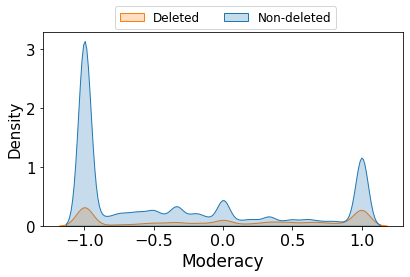

In [14]:
df = df_tweetscov19[['is_deleted', 'moderacy']]
plot_kdeplot_v1(df, 'is_deleted','moderacy' ,'Moderacy' ,'TweetsCov19', 'kdeplot_tweetscov19_moderacy_all_tweets_conditionaldistribution')

In [15]:
def plot_kdeplot_v2(df, hue, x, x_label, titel, name): 
    
    #fig = plt.figure()
    #ax = fig.add_subplot()
    #ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill", legend= False)

    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_title('Moderacy', fontsize=22)
    ax.set_ylabel(ylabel='Density', fontsize=22)
    ax.set_xlabel(xlabel=x_label, fontsize=22)

    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.legend([],[], frameon=False)

    plt.tight_layout()
#     plt.savefig('../plots/'+name+'.pdf')


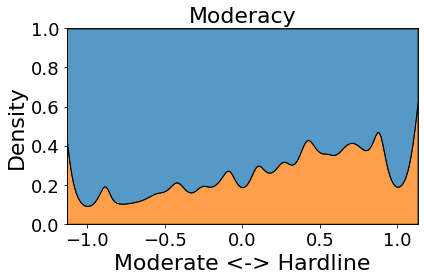

In [16]:
df = df_tweetscov19[['is_deleted', 'moderacy']]
plot_kdeplot_v2(df, 'is_deleted','moderacy' ,'Moderate <-> Hardline' ,'TweetsCov19', 'kdeplot_tweetscov19_moderacy_all_tweets_Normalizethestackeddistribution')

In [51]:
def plot_kdeplot_v3(df, hue, x, x_label, titel, name): 
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    ax = sns.kdeplot(
    data=df, x=x, hue=hue,
    cumulative=True, common_norm=False, common_grid=True,
    )
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')


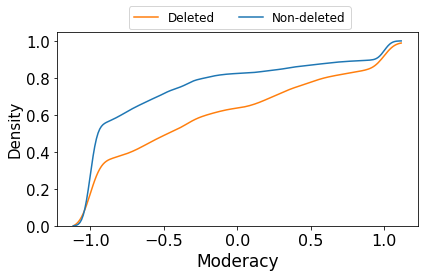

In [52]:
df = df_tweetscov19[['is_deleted', 'moderacy']]
plot_kdeplot_v3(df, 'is_deleted','moderacy' ,'Moderacy' ,'TweetsCov19', 'kdeplot_tweetscov19_moderacy_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

***

In [37]:
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram(df, titel):
    
    fig, ax = plt.subplots()
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('pink')
    patches[1].set_label('Moderate')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('purple')
    patches[9].set_label('Hardline')
        
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Moderacy', fontsize=22)
    ax.set_ylabel('Number of Tweets', fontsize=22)
    ax.set_xlabel(xlabel='Moderate <-> Hardline' , fontsize=22)
    ax.yaxis.set_major_formatter(thousands)

    #plt.title('Political polarization', fontsize=18)
    plt.legend(loc='upper center', fontsize=14)
    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

In [38]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [42]:
df_tweetscov19_del[df_tweetscov19_del.tweet_moderacy_polarisation > 0].shape

(28710, 9)

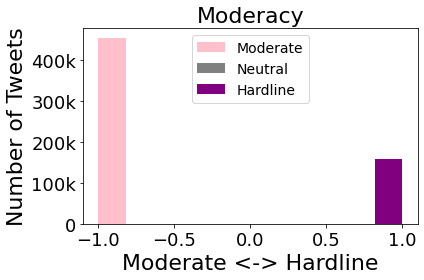

In [39]:
#df = df_tweetscov19.drop_duplicates(subset=['Username'])
df = df_tweetscov19
plot_histogram(df['tweet_moderacy_polarisation'],'hist_tweetsCov19_moderacy_polarized_tweets(alltweets)')

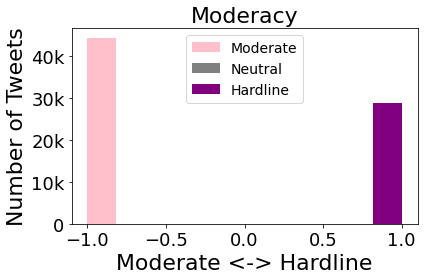

In [40]:
#df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
df = df_tweetscov19_del
plot_histogram(df['tweet_moderacy_polarisation'],'hist_tweetsCov19_moderacy_polarized_tweets(deletedtweets)')

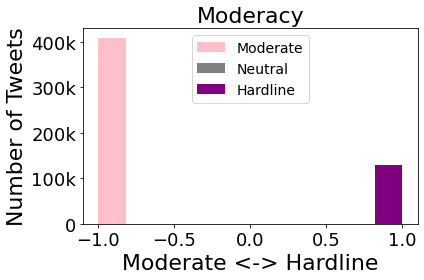

In [41]:
#df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
df = df_tweetscov19_undel
plot_histogram(df['tweet_moderacy_polarisation'],'hist_tweetsCov19_moderacy_polarized_tweets(nondeletedtweets)')

***

# Heatmap
### Reputation-Polarisierung

***

***

In [5]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

def density_hp(df, title, x, y, color):
    fig = px.density_heatmap(df, x=x, y=y, nbinsx=20, nbinsy=20, color_continuous_scale=color)
    fig.layout.height = 500
    fig.layout.width = 600
    fig.update_layout(
        title= dict(
            text= "Moderacy",
            y=0.95,
            x=0.45,
            xanchor= 'center',
            yanchor= 'top'),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
        xaxis = dict(
            title='Moderate <-> Hardline',
            
            tickmode = 'linear',
            tickformat=".1f",
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 28,
            color = 'black'
              ),
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        yaxis = dict(
            tickmode = 'linear',
            tickformat=".1f",
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 28,
            color = 'black'
              ),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        coloraxis_colorbar=dict(
            title="Tweets",
            thicknessmode="pixels",
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 25,
            color = 'black'
              ),
            ),


        )

    #fig.show()
    pyo.plot(fig, filename=title+".html")
#     fig.write_image('../plots/heatmaps/'+title+'.pdf')

In [6]:
#All Tweets
df = df_tweetscov19[['is_deleted', 'moderacy', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [7]:
density_hp(df,'density_hp_moderacy_polarisation_tweetscov19_alltweets' ,'moderacy', 'Reputation', 'Purples')

In [8]:
density_hp(df_del,'density_hp_moderacy_polarisation_tweetscov19_deleted' ,'moderacy', 'Reputation', 'Purples')

In [9]:
density_hp(df_undel,'density_hp_moderacy_polarisation_tweetscov19_nondeleted' ,'moderacy', 'Reputation', 'Purples')

***

***

# TweetKB

***

In [23]:
path = '../data/tweetskb_moderacy_polarized_users_with_atleast_one_polarized_domain_v2.tsv'

df_tweetskb_moderacy_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_moderates', 'Number_of_hardlines', 'Sum_polarised_domains', 'moderacy'])

print('Shape :', df_tweetskb_moderacy_polarized_and_neutralized.shape)
df_tweetskb_moderacy_polarized_and_neutralized.head()

Shape : (48333, 5)


,Username,Number_of_moderates,Number_of_hardlines,Sum_polarised_domains,moderacy
0,0000Condor,0,1,1,1.0000
1,007AliSohrab,-1,0,1,-1.0000
2,007plus100,-1,0,1,-1.0000
3,01_zebra,0,1,1,1.0000
4,01pod,-1,0,1,-1.0000


In [24]:
path = '../data/TweetsKB_alltweets_reputation_deletionratio.tsv'

df_tweetskb_alltweets_reputation_deletionratio = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'num_posted', 'num_del', 'Deletionratio',  'Reputation'])

print('Form :', df_tweetskb_alltweets_reputation_deletionratio.shape)
df_tweetskb_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,num_posted,num_del,Deletionratio,Reputation
0,1178791636039589889,DCComics,3349606,563,False,42,0,0.0000,0.9998
1,1179833467644850176,DCComics,3351904,563,False,42,0,0.0000,0.9998
2,1180490470125965313,DCComics,3354879,563,False,42,0,0.0000,0.9998
3,1187059882534400000,DCComics,3369484,562,False,42,0,0.0000,0.9998
4,1190311668141580288,DCComics,3376154,564,False,42,0,0.0000,0.9998


In [25]:
df_tweetskb_alltweets_reputation_deletionratio = df_tweetskb_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetskb_moderacy_polarized_and_neutralized = df_tweetskb_moderacy_polarized_and_neutralized[['Username', 'moderacy']]

df_tweetskb = pd.merge(df_tweetskb_alltweets_reputation_deletionratio, df_tweetskb_moderacy_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetskb.shape)
df_tweetskb.head()

Form : (408258, 4)


,Username,is_deleted,Reputation,moderacy
0,DCComics,False,0.9998,-1.0000
1,DCComics,False,0.9998,-1.0000
2,DCComics,False,0.9998,-1.0000
3,DCComics,False,0.9998,-1.0000
4,DCComics,False,0.9998,-1.0000


***

In [18]:
path_tweetskb = '../data/tweetskb_domainsLR_moderacy_polarized_tweets.tsv'

df_tweetskb = pd.read_csv(path_tweetskb, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'is_deleted', 'Domains', 'Moderate_domains', 'Number_of_moderate_domains', 'Hardline_domains', 'Number_of_hardline_domains', 'tweet_moderacy_polarisation'])

print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (133676, 9)


,Tweet_Id,Username,is_deleted,Domains,Moderate_domains,Number_of_moderate_domains,Hardline_domains,Number_of_hardline_domains,tweet_moderacy_polarisation
0,1178791665735208960,dailytelegraph,False,dailytelegraph.com.au,[],0,['dailytelegraph.com.au'],1,1.0000
1,1178792395573383168,dailyherald,False,dailyherald.com,['dailyherald.com'],-1,[],0,-1.0000
2,1178792740664102913,ajc,False,ajc.com,['ajc.com'],-1,[],0,-1.0000
3,1178793142134292481,JuanchoS,False,msn.com,['msn.com'],-1,[],0,-1.0000
4,1178793578350497806,MichaeDemitre,False,rawstory.com,[],0,['rawstory.com'],1,1.0000


----

In [2]:
path = '../data/df_tweetskb_october2019_moderacy_polarized_users.tsv'
October = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('October: ', '{0:.3g}'.format(October.politic.mean()))

path = '../data/df_tweetskb_november2019_moderacy_polarized_users.tsv'
November = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('November: ', '{0:.3g}'.format(November.politic.mean()))

path = '../data/df_tweetskb_december2019_moderacy_polarized_users.tsv'
December = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('December: ', '{0:.3g}'.format(December.politic.mean()))

path = '../data/df_tweetskb_januar2020_moderacy_polarized_users.tsv'
Januar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Januar: ', '{0:.3g}'.format(Januar.politic.mean()))

path = '../data/df_tweetskb_februar2020_moderacy_polarized_users.tsv'
Februar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('February: ', '{0:.3g}'.format(Februar.politic.mean()))

path = '../data/df_tweetskb_maerz2020_moderacy_polarized_users.tsv'
March = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('March: ', '{0:.3g}'.format(March.politic.mean()))

path = '../data/df_tweetskb_April2020_moderacy_polarized_users.tsv'
April = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('April: ', '{0:.3g}'.format(April.politic.mean()))

path = '../data/df_tweetskb_mai2020_moderacy_polarized_users.tsv'
Mai = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Mai: ', '{0:.3g}'.format(Mai.politic.mean()))


October:  -0.496
November:  -0.49
December:  -0.518
Januar:  -0.48
February:  -0.495
March:  -0.535
April:  -0.535
Mai:  -0.511


***

## KDE-Plot

In [26]:
# df_tweetskb = df_tweetskb[df_tweetskb['moderacy'] != 0]

# print('Shape: ', df_tweetskb.shape)
# df_tweetskb.head()

In [27]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [28]:
print('Deleted Tweets:', df_tweetskb_del.shape)
print('Non-deleted Tweets:', df_tweetskb_undel.shape)

Deleted Tweets: (90123, 4)
Non-deleted Tweets: (318135, 4)


In [29]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['moderacy']>0]
print('Alle hard. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of hard. Users in gesammten Tweets:', df.shape[0])

df = df_tweetskb[df_tweetskb['moderacy']<0]
print('Alle mod. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of mod. Users in gesammten Tweets:', df.shape[0])


Alle Users: 48333
Alle hard. Users in gesammten Tweets: 15573
Tweets of hard. Users in gesammten Tweets: 153333
Alle mod. Users in gesammten Tweets: 31277
Tweets of mod. Users in gesammten Tweets: 230305


In [30]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['moderacy']>0]
print('Alle hard. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of hard. Users in gesammten Tweets:', df.shape[0])


df = df_tweetskb_del[df_tweetskb_del['moderacy']<0]
print('Alle mod. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of mod. Users in gesammten Tweets:', df.shape[0])


Alle Users: 11525
Alle hard. Users in gelöschten Tweets: 4745
Tweets of hard. Users in gesammten Tweets: 46654
Alle mod. Users in gelöschten Tweets: 6293
Tweets of mod. Users in gesammten Tweets: 37800


In [31]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['moderacy']>0]
print('Alle hard. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of hard. Users in gesammten Tweets:', df.shape[0])


df = df_tweetskb_undel[df_tweetskb_undel['moderacy']<0]
print('Alle mod. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of mod. Users in gesammten Tweets:', df.shape[0])


Alle Users: 40071
Alle hard. Users in nicht gelöschten Tweets: 11867
Tweets of hard. Users in gesammten Tweets: 106679
Alle mod. Users in nicht gelöschten Tweets: 27012
Tweets of mod. Users in gesammten Tweets: 192505


In [32]:
df_tweetskb_neutral = df_tweetskb[df_tweetskb['moderacy']==0]
print('Alle Users:', df_tweetskb_neutral.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['moderacy']==0]
print('Alle neutral Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in gelöschten Tweets:', df.shape[0])

df = df_tweetskb_undel[df_tweetskb_undel['moderacy']==0]
print('Alle neutral Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 1483
Alle neutral Users in gelöschten Tweets: 487
Tweets of neutral Users in gelöschten Tweets: 5669
Alle neutral Users in nicht gelöschten Tweets: 1192
Tweets of neutral Users in nicht gelöschten Tweets: 18951


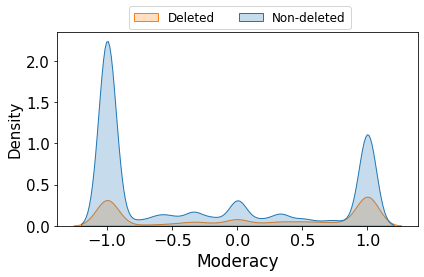

In [33]:
df = df_tweetskb[['is_deleted', 'moderacy']]
plot_kdeplot_v1(df, 'is_deleted','moderacy' ,'Moderacy' ,'TweetsCov19', 'kdeplot_tweetskb_moderacy_all_tweets_conditionaldistribution')

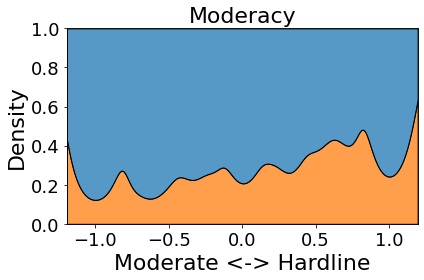

In [34]:
df = df_tweetskb[['is_deleted', 'moderacy']]
plot_kdeplot_v2(df, 'is_deleted','moderacy' ,'Moderate <-> Hardline' ,'TweetsCov19', 'kdeplot_tweetskb_moderacy_all_tweets_Normalizethestackeddistribution')

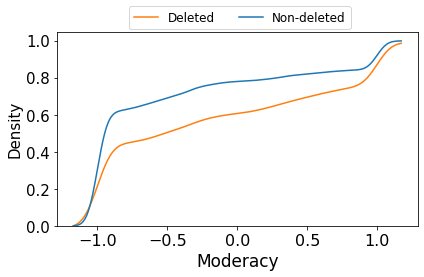

In [50]:
df = df_tweetskb[['is_deleted', 'moderacy']]
plot_kdeplot_v3(df, 'is_deleted','moderacy' ,'Moderacy' ,'TweetsCov19', 'kdeplot_tweetskb_moderacy_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

****

In [24]:
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram_kb(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('pink')
    patches[1].set_label('Moderate')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('purple')
    patches[9].set_label('Hardline')
   
          
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Moderacy', fontsize=22)
    ax.set_ylabel('Number of Tweets', fontsize=22)
    ax.set_xlabel(xlabel='Moderate <-> Hardline' , fontsize=22)
    ax.yaxis.set_major_formatter(thousands)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

In [25]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

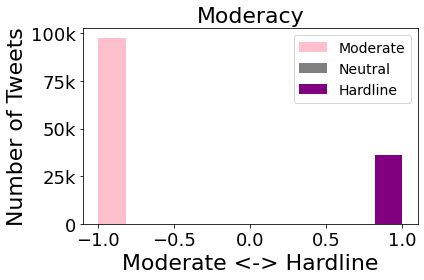

In [29]:
#All Tweets
#df = df_tweetskb.drop_duplicates(subset=['Username'])
df = df_tweetskb
plot_histogram_kb(df['tweet_moderacy_polarisation'],'hist_tweetsKB_moderacy_polarized_tweets(alltweets)')

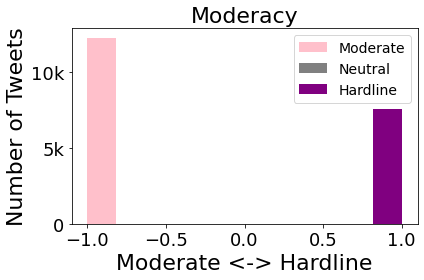

In [30]:
#df = df_tweetskb_del.drop_duplicates(subset=['Username'])
df = df_tweetskb_del
plot_histogram_kb(df['tweet_moderacy_polarisation'],'hist_tweetsKB_moderacy_polarized_tweets(deletedtweets)')

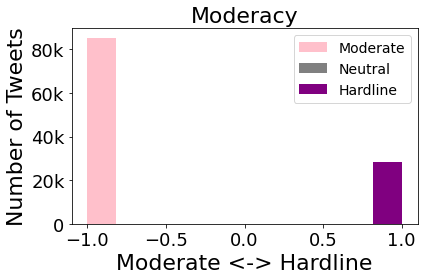

In [31]:
#df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
df = df_tweetskb_undel
plot_histogram_kb(df['tweet_moderacy_polarisation'],'hist_tweetsKB_moderacy_polarized_tweets(nondeletedtweets)')

***

# Heatmap
### Reputation-Polarisierung

***

In [13]:
#All Tweets
df = df_tweetskb[['is_deleted', 'moderacy', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [14]:
density_hp(df,'density_hp_moderacy_polarisation_tweetskb_alltweets' ,'moderacy', 'Reputation', 'Purples')

In [15]:
density_hp(df_del,'density_hp_moderacy_polarisation_tweetskb_deleted' ,'moderacy', 'Reputation', 'Purples')

In [16]:
density_hp(df_undel,'density_hp_moderacy_polarisation_tweetskb_nondeleted' ,'moderacy', 'Reputation', 'Purples')